# CSCE 633 :: Machine Learning :: Texas A&M University :: Spring 2022

# Programming Assignment 3 (PA 3)
**Name:**  Ayad Masud
**UIN:**   73009045

# Support Vector Machines

- **100 points**
- **Due Tuesday, *April* 12, 11:59 pm**

In this assignment, you'll be training support vector machines for classification.

### Instructions
- You are allowed to use machine learning libraries such as `scikit-learn` for this assignment. A few of the basic library methods have been already imported for you. Feel free to import any additional methods that you need.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You are free to add any number of additional code blocks that you deem necessary. 
- Once you've filled out your solutions, submit the notebook on Canvas following the instructions [here](https://people.engr.tamu.edu/guni/csce421/assignments.html).
- Do **NOT** forget to type in your name and UIN at the beginning of the notebook.
- Do **NOT** remove any code provided.

In [6]:
# importing libraries
import sys
import pickle

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 (10 points)

## Data Preprocessing

For this assignment, we will use the Statlog dataset. This database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number. The attributes are numerical, in the range 0 to 255. More information about the database can be found [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29).

In [7]:
# Read the data
df_train = pd.read_csv('./satimage_train.csv')
df_test = pd.read_csv('./satimage_test.csv')

In [8]:
df_test.head().T

,0,1,2,3,4
Class,1.000000,1.000000,1.000000,1.000000,1.000000
X1,-0.031250,-0.031250,-0.031250,-0.031250,-0.031250
X2,0.236364,0.309091,0.309091,0.381818,0.381818
X3,0.142857,0.142857,0.261905,0.238095,0.357143
X4,-0.107438,-0.107438,-0.107438,-0.090909,0.041322
X5,0.129032,-0.129032,NaN,-0.225806,NaN
X6,0.163636,0.381818,0.236364,0.309091,0.381818
X7,0.242105,0.242105,0.136842,0.221053,0.326316
X8,-0.015625,-0.093750,-0.093750,-0.015625,0.046875
X9,0.093750,-0.281250,-0.156250,-0.250000,-0.031250


### To-do steps
1. Remove rows with `NaN` values from `df_train` and `df_test`.
2. Create `X_train` and `X_test` by selecting columns `X1` through `X36`. Create `y_train` and `y_test` by selecting column `Class`.
2. Normalize `X_train` using `MinMaxScaler` from scikit-learn. Then normalize `X_test` on the normalization parameters derived from `X_train`.

In [9]:
# Step 1: Drop NaN valuesc
df_train = df_train.dropna()
df_test = df_test.dropna()

# Step 2: Create train and test data
# Extract features (X) and labels (y) from training and test data
X_train = df_train.iloc[:, 1:37]  # Select columns X1 through X36
y_train = df_train['Class']

X_test = df_test.iloc[:, 1:37]    # Select columns X1 through X36
y_test = df_test['Class']

# Step 3: Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Convert to binary classification
y_train[y_train != 6] = 0
y_train[y_train == 6] = 1

y_test[y_test != 6] = 0
y_test[y_test == 6] = 1

/var/folders/0d/lzd4_bln5456tqbpclpkwljc0000gn/T/ipykernel_11422/717146307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train[y_train == 6] = 1
/var/folders/0d/lzd4_bln5456tqbpclpkwljc0000gn/T/ipykernel_11422/717146307.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test == 6] = 1


## Question 2 (30 points) 

## Hyperparameter Tuning 

Consider the binary classification that consists of distinguishing class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to solve this classification problem. For each value of the polynomial degree, $d$ = 1, 2, 3, 4, plot the average 5-fold cross-validation error plus or minus one standard deviation as a function of $C$ (let the other parameters of the polynomial kernels be equal to their default values) on the training data.

**Choose a minimum of 5 $C$ values spread across a wide range**

**Report the best value of the trade-off constant $C$ measured on the training internal cross-validation.**

In [11]:
def cross_validation_score(X, y, c_vals, n_folds, d_vals):
    """
    Calculates the cross validation error and returns its mean and standard deviation.
    
    Args:
        X: features
        y: labels
        c_vals: list of C values
        n_folds: number of cross-validation folds
        d_vals: list of degrees of the polynomial kernel
    
    Returns:
        Tuple of (list of error_mean, list of error_std)       
    """
    
    error_mean = np.zeros((len(c_vals), len(d_vals)))
    error_std = np.zeros((len(c_vals), len(d_vals)))
    
    skf = StratifiedKFold(n_splits=n_folds)
    
    for i, c in enumerate(c_vals):
        for j, d in enumerate(d_vals):
            errors = []
            for train_index, val_index in skf.split(X, y):
                X_train_fold, X_val_fold = X[train_index], X[val_index]
                y_train_fold, y_val_fold = y[train_index], y[val_index]
                
                model = SVC(C=c, kernel='poly', degree=d)
                model.fit(X_train_fold, y_train_fold)
                y_pred = model.predict(X_val_fold)
                error = mean_absolute_error(y_val_fold, y_pred)
                errors.append(error)
            
            error_mean[i, j] = np.mean(errors)
            error_std[i, j] = np.std(errors)
    
    return error_mean, error_std

In [12]:
######################
#   YOUR CODE HERE   #
######################
n_folds = 5
d_vals = [1, 2, 3, 4]
c_vals = [0.01, 0.1, 1, 10, 100]  # Provide a list of C values

In [13]:
# Run cross validation to find the best hyperparameters
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
error_mean, error_std = cross_validation_score(X_train_array, y_train_array, c_vals, n_folds, d_vals)

# Find the best C value for each degree
best_c_indices = np.argmin(error_mean, axis=0)
best_c_values = [c_vals[i] for i in best_c_indices]

print(f"Cross-validation completed for {len(c_vals)} C values and {len(d_vals)} polynomial degrees")
print(f"Best C values for each degree: {list(zip(d_vals, best_c_values))}")

Cross-validation completed for 5 C values and 4 polynomial degrees
Best C values for each degree: [(1, 100), (2, 10), (3, 10), (4, 1)]


**Plot the average cross validation error.**

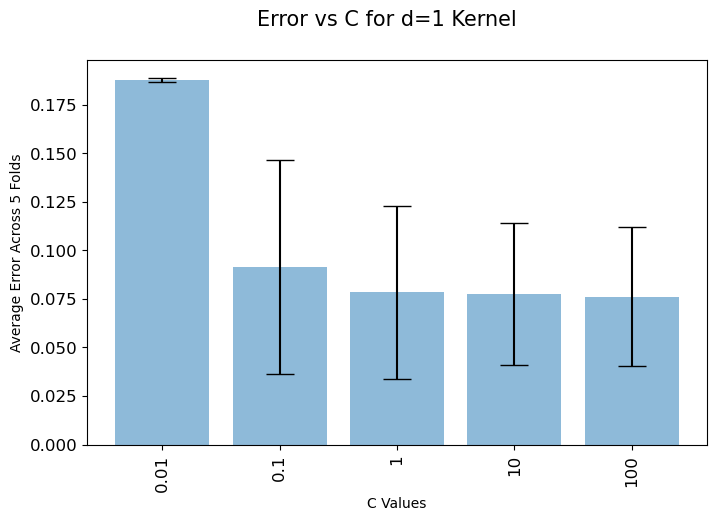

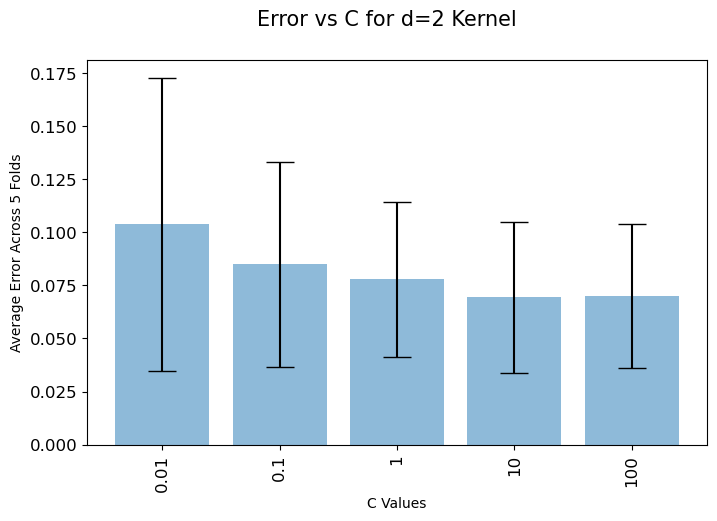

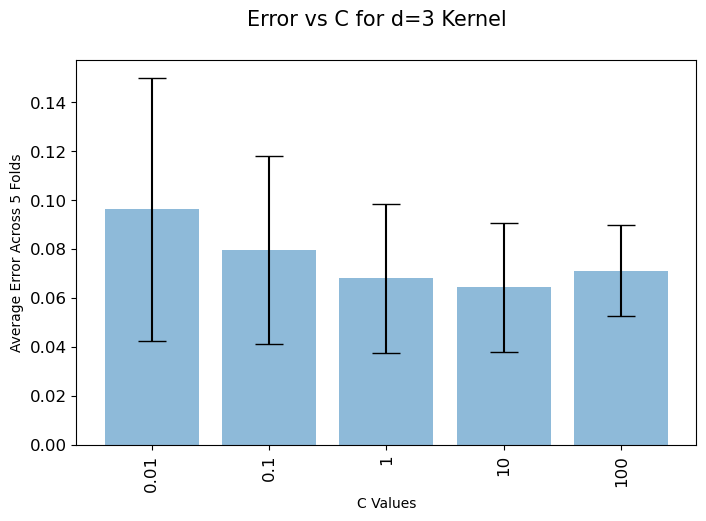

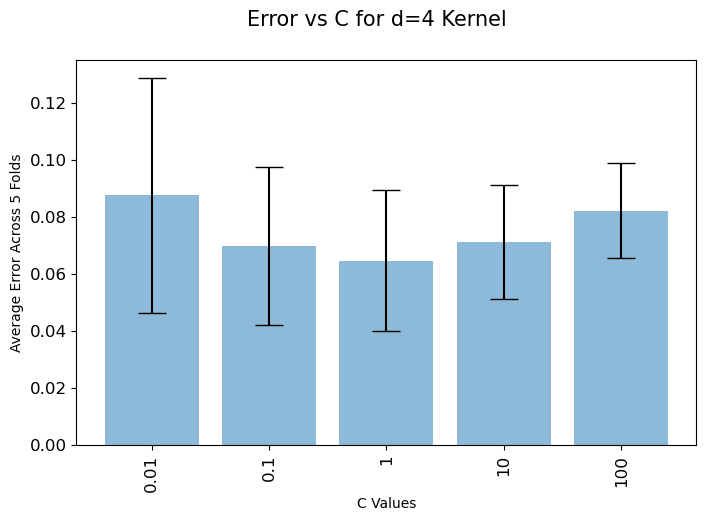

In [14]:
for i,d_val in enumerate(d_vals):
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize = (8,5)) 
    plt.bar(range(len(c_vals)), error_mean[:,i], 
            yerr=error_std[:,i],
            align='center',
            alpha=0.5,
            ecolor='k',
            capsize=10,
            label = "Average Error")
    plt.suptitle('Error vs C for d={} Kernel'.format(d_val), fontsize=15)
    plt.xlabel('C Values', fontsize=10)
    plt.xticks(range(len(c_vals)), c_vals, rotation='vertical')
    plt.ylabel('Average Error Across {} Folds'.format(n_folds), fontsize=10)

**Plot $(C; d)$ pairs with their corresponding cross validation errors.**

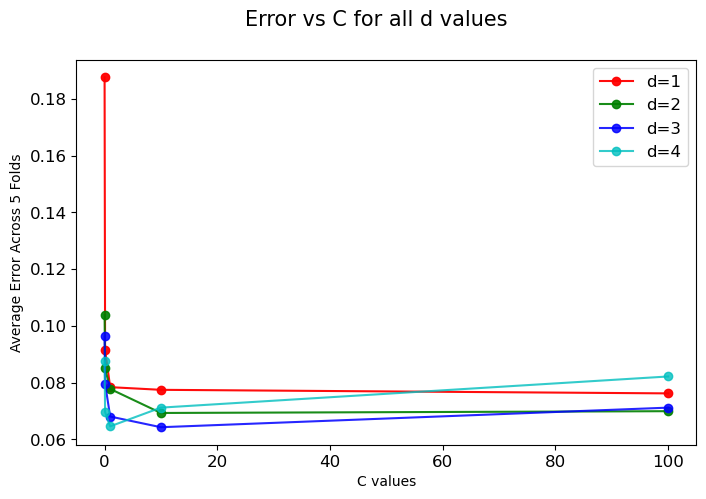

In [15]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5))
colors = ['r', 'g', 'b', 'c', 'y']
for i,d_val in enumerate(d_vals):
    plt.plot(c_vals, error_mean[:,i],
             marker='o', 
             color=colors[i%5], 
             alpha=1 - 0.2 * d_val/len(d_vals), 
             label = "d={}".format(d_val))
plt.suptitle('Error vs C for all d values', fontsize=15)
plt.xlabel('C values', fontsize=10)
plt.ylabel('Average Error Across {} Folds'.format(n_folds), fontsize=10)
plt.legend()

## Question 3 (30 points) 

## Model Training and Testing

**Build models on the full training data on the best $C$ value you found previously for each $d$ value using the 5-fold cross validation.**

You need to return test error, number of support vectors, number of margin violations, and margin size

A data point (i.e., x) is said to violate margin if **distance of data point 
from hyperplane < margin size**. Therefore, number of total margin violations is count of such data points present in dataset.


Hint: Margin Size: Use the dual coefficients (alpha values) of SVM along with support vectors to calculcate margin. Please refer to slide 17 in slide deck 13 for more details.

In [16]:
def build_model(X_train, y_train, X_test, y_test, c_vals, d_vals):
    """
    Trains model on a dataset for given values of C and d. Returns the error on the test data,
    the number of support vectors, the number of margin violations, and the margin size.
    
    Args:
        X_train: features in training data
        y_train: train labels
        X_test: features in test data
        y_test: test labels
        c_vals: list of C values
        d_vals: list of degrees of the polynomial kernel
    
    Returns:
        Tuple of (error_test, support_vectors, margin_violations, margin_size)       
    """
    error_test = np.zeros(len(d_vals))
    support_vectors = np.zeros(len(d_vals))
    margin_violations = np.zeros(len(d_vals))
    margin_size = np.zeros(len(d_vals))
    
    for i, (d, c) in enumerate(zip(d_vals, c_vals)):
        # Train SVM model with the given C and d values
        model = SVC(C=c, kernel='poly', degree=d)
        model.fit(X_train, y_train)
        
        # Calculate test error
        y_pred = model.predict(X_test)
        error_test[i] = mean_absolute_error(y_test, y_pred)
        
        # Count number of support vectors
        support_vectors[i] = len(model.support_)
        
        # Calculate margin size
        # For a linear SVM, margin = 1/||w||, for kernel SVMs we use dual formulation
        # We extract the dual coefficients (alpha values)
        dual_coef = model.dual_coef_
        support_vectors_data = model.support_vectors_
        
        # Calculating the margin size (1/||w||)
        # For kernel SVM, ||w||² = sum_i sum_j alpha_i * alpha_j * K(x_i, x_j)
        margin_size[i] = 1.0 / np.sqrt(np.sum(np.square(dual_coef)))
        
        # Calculate margin violations
        # A data point violates margin if its distance from hyperplane < margin size
        decision_values = np.abs(model.decision_function(X_train))
        violations = np.sum(decision_values < margin_size[i])
        margin_violations[i] = violations
    
    return error_test, support_vectors, margin_violations, margin_size

In [17]:
######################
#   YOUR CODE HERE   #
######################
d_vals= [1,2,3,4] # List of degrees
c_vals = [0.01, 0.1, 1, 10, 100]# Provide a list of corresponding best C values

In [18]:
error_test, support_vectors, margin_violations, margin_size = build_model(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          c_vals, d_vals)

**Plot the test errors for each model, as a function of $d$.**

Text(0, 0.5, 'Test Error')

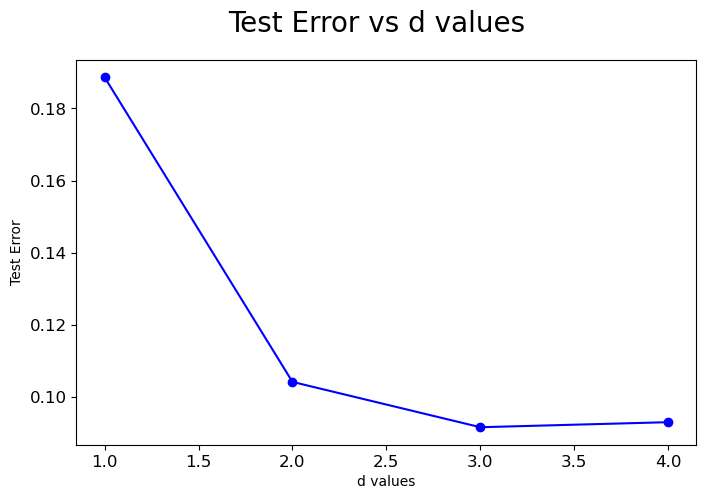

In [26]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, error_test ,marker='o', color='b')
plt.suptitle('Test Error vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Test Error', fontsize=10)

## Question 4 (10 points) 

## Number of support vectors

**Plot the number of support vectors obtained as a function of $d$.**

Text(0, 0.5, 'Number of Support Vectors')

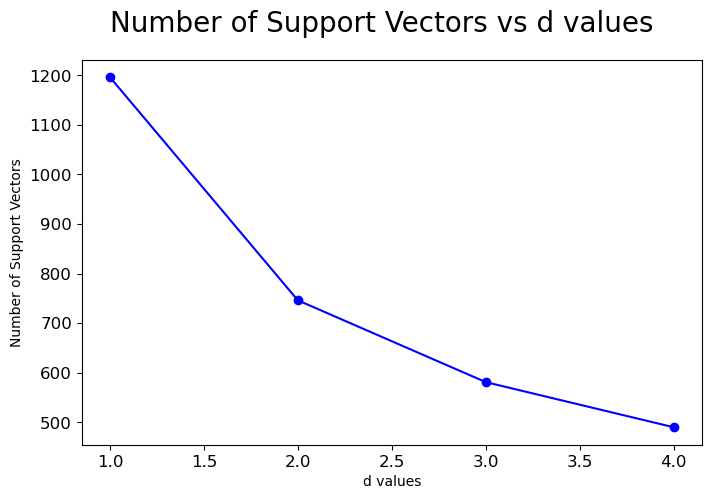

In [25]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, support_vectors, marker='o', color='b')
plt.suptitle('Number of Support Vectors vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Number of Support Vectors', fontsize=10)

## Question 5 (10 points)

## Number of Margin Violations

**Plot the number of support vectors that violate the margin hyperplanes as a function of $d.**

Text(0, 0.5, 'Number of Support Vectors that Violate the Margin ')

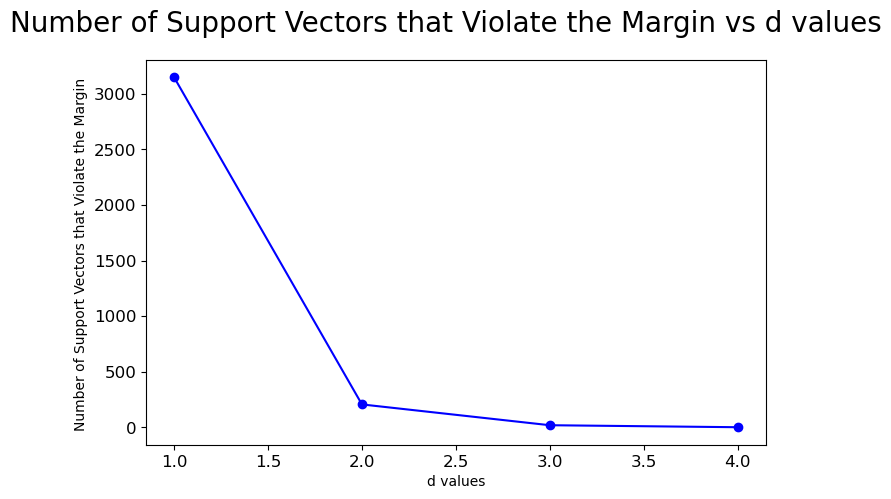

In [24]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, margin_violations, marker='o', color='b')
plt.suptitle('Number of Support Vectors that Violate the Margin vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Number of Support Vectors that Violate the Margin ', fontsize=10)

## Question 6 (10 points) 

## Margin Size vs Support Vectors

**Explain how the parameter $d$ infuences the model fit (plot the margin size as a function of $d).**

Make sure to plot **AND** explain.

Text(0, 0.5, 'Hyperplane Margin Size')

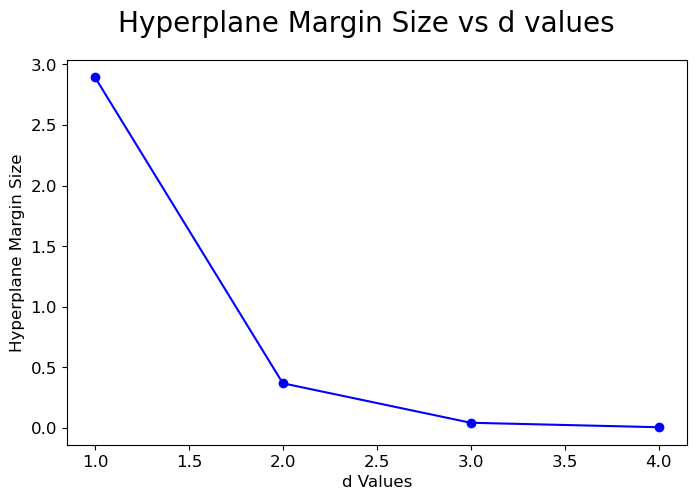

In [23]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, margin_size, marker='o', color='b')
plt.suptitle('Hyperplane Margin Size vs d values', fontsize=20)
plt.xlabel('d Values', fontsize=12)
plt.ylabel('Hyperplane Margin Size', fontsize=12)

In [27]:
## TYPE YOUR ANSWER BELOW
# From the plot, we can observe that margin size decreases dramatically as the polynomial degree d increases. 
# Using higher degree polynomials allow more flexibile decision boundaries to help fit data with complex patterns.
# As the degrees go up the number of support vectors decrease, which means we need fewer points to define the boundary, but this comes
# at the cost of a very tight margin. 